### Imports

In [568]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

#Model
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Model assessment
from sklearn.metrics import classification_report

### Loading data

In [570]:
attrition = pd.read_csv('attrition.csv')
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
target = pd.read_csv('test_target.csv')

### Data check

In [ ]:
# Checking the basic information for "attition"
attrition.info()

In [571]:
# Checking the basic information for "target"
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   EmployeeNumber  147 non-null    int64
 1   Attrition       147 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


In [572]:
# Checking the basic information for "df1"
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeNumber           4449 non-null   int64  
 1   Age                      4449 non-null   float64
 2   BusinessTravel           4449 non-null   object 
 3   DailyRate                4449 non-null   float64
 4   Department               4449 non-null   object 
 5   DistanceFromHome         4449 non-null   float64
 6   Education                4449 non-null   float64
 7   EducationField           4449 non-null   object 
 8   EmployeeCount            4449 non-null   float64
 9   EnvironmentSatisfaction  4449 non-null   float64
 10  Gender                   4449 non-null   object 
 11  HourlyRate               4449 non-null   float64
 12  JobInvolvement           4449 non-null   float64
 13  JobLevel                 4449 non-null   float64
 14  JobRole                 

In [573]:
# Checking the basic information for "df2"
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

In [574]:
# Checking if data in "df2" contains null value
df2.isnull().sum()

EmployeeNumber                0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Attrition                   147
YearlyIncome                  0
dtype: int64

In [575]:
# Checking basic informations for data in "df2"
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Over18                    4449 non-null   object 
 2   OverTime                  4449 non-null   object 
 3   PercentSalaryHike         4449 non-null   float64
 4   PerformanceRating         4449 non-null   float64
 5   RelationshipSatisfaction  4449 non-null   float64
 6   StandardHours             4449 non-null   float64
 7   StockOptionLevel          4449 non-null   float64
 8   TotalWorkingYears         4449 non-null   float64
 9   TrainingTimesLastYear     4449 non-null   float64
 10  WorkLifeBalance           4449 non-null   float64
 11  YearsAtCompany            4449 non-null   float64
 12  YearsInCurrentRole        4449 non-null   float64
 13  YearsSinceLastPromotion   4449 non-null   float64
 14  YearsWit

Conclusion: it can be observed that column "Attirtion" in dataframe "df2" contains (4449-4302=147) nulls --> the same numbers of records are in dataframe "target", which means that the "target" frame may have been separated from the "df2" frame

### EDA

1. New df creation by merging df1 and df2

In [576]:
# Cration of new dataframe "data" by merging files: df1 and df2
data = df1.merge(df2)

In [577]:
# Checking basic informations for data in "data"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

2. Verification of dataset basic information

In [578]:
data.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [579]:
# CSV file as archiwum, csv file consist of merged data from df1 and df2
data.to_csv('/Users/Agnieszka/.git/Klasyfikacja/data.csv', index=True)
data.to_csv('data.csv', index=True)

In [ ]:
#training dataframe creation without data for test X_test
# if target dataframe contains test data, and if "data" dataframe has nulls the same as in target this means that "train" data
# is "data"-"nulls"
train_DF = data.loc[data['Attrition'].notnull()]

# and "test" data is "data" only with "null" attition
X_test = data.loc[data['Attrition'].isnull()]

In [ ]:
train_DF

In [ ]:
X_test

In [ ]:
train_DF.describe()

In [ ]:
X_test.describe()

In [ ]:
train_DF.info()

In [ ]:
X_test.info()

In [580]:
# column names
columns=train_DF.columns
columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome'],
      dtype='object')

In [581]:
len(columns)
#therefore, number of features = 36-1=35

36

In [ ]:
train_DF.isna().sum()

In [ ]:
print(train_DF[train_DF['NumCompaniesWorked'] == 0])

In [ ]:
#checking value in "YearsAtCompany" column
train_DF['YearsAtCompany'].describe()

In [ ]:
#checking data suspicious to be outliers in column "YearsAtCompany"
print(train_DF[train_DF['YearsAtCompany'] > 30])

3. Dupliacates

In [583]:
#dupliacted rows

duplicates_mask=train_DF.duplicated(subset=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome'])

duplicated_train_DF = train_DF[duplicates_mask]
duplicated_train_DF
duplicated_train_DF.to_csv('Duplicates.csv')
duplicated_train_DF.to_csv('/Users/Agnieszka/.git/Klasyfikacja/Duplicates.csv')



In [584]:
#duplicates removing
train_DF.drop_duplicates (subset=train_DF[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome']], keep='first', inplace=True)

In [585]:
#verification of train_DF dataframe after dropping duplicates (1237 duplicates removed)
train_DF.shape

(3065, 36)

4. Unique values

In [586]:
#Printing all unique values from individual columns
for column in train_DF.columns:

    unique_values = train_DF[column].unique()

    print(f"Unique value for column: {column}:")

    print(unique_values)

    print()

Unique value for column: EmployeeNumber:
[ 104 1638  164 ... 7973 7974 7977]

Unique value for column: Age:
[  30.   38.   26.   28.   35.   34.   32.   42.   40.   48.   39.   18.
   43.   21.   53.   45.   29.   33.   41.   24.   37.   50.   36.   52.
   47.   31.   49.   54.   44.   22.   46.   27.   55.   59.   25.   23.
   56.   20.   60.   51.   58.   19.   57. 8825. 3628. 6287. 9330. 1107.
 4454. 9155. 9890. 1189. 9195. 9014. 1136. 5582. 2404. 1541. 4510. 4322.
 4988. 8388. 2530. 8901. 2852. 2459. 2982. 4973. 8534. 8314. 4130. 4328.
 7952. 8699. 3147. 8889. 3871. 9531. 8167. 5257. 8136. 7390. 2993. 5672.
 5933. 5614. 5007. 3095. 9219. 6749. 4515. 6715. 1141. 8949. 3636. 4805.
 5959. 9384. 8042. 1423. 7056. 5116. 2667. 8703. 1126. 9612. 7845. 6998.
 1788. 6727. 5377. 5565. 4558. 6506. 4591. 7662. 6510. 4985. 9581. 2095.
 2275. 6399. 4935. 2698. 7617. 9661. 4834. 2242. 1915. 3226. 7924. 9529.
 8326. 1578. 8560. 9078. 6429. 9243. 2186. 2888. 6210. 3388. 2423. 6025.
 1530. 7017. 413

5. Outliers

Outliers verification through boxplots (rejecting columns without numerical data) - for train data

In [ ]:
for column in train_DF.columns:
    if(np.issubdtype(train_DF[column].dtype, np.number)):
        plt.figure()
        plt.boxplot(train_DF[column])
        plt.title(column)
        plt.xlabel('Column')
        plt.ylabel('Value')

Outliers verification for X_test data

In [ ]:
for column in X_test.columns:
    if(np.issubdtype(X_test[column].dtype, np.number)):
        plt.figure()
        plt.boxplot(X_test[column])
        plt.title(column)
        plt.xlabel('Column')
        plt.ylabel('Value')
plt.show()

for X_test all outliers seems to be realiable




Boxplot analysis was performed to identify outliers in the sets
Improbable values identified for columns: 'Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
Due to the presence of management group in the dataset, values considered as outliers for the columns 'MonthlyIncome' and 'YearlyIncome' were considered probable and left untransformed.
Columns 'EmployeeCount', 'Over18' and 'StandardHours' will be removed due to poor usability for the model (same values).
Unique value for column: Over18: ['Y']
Unique value for column: StandardHours:[80.]
Unique value for column: EmployeeCount:[1.]

Checking the impact of outliers on the change of the median value of the entire set on the example of the 'Age' column

In [592]:
# creation of outlieres variable column

outliers = train_DF[['Age', 'DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 
                                 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [ ]:
#function for median calculation
def calculate_Median (data, column_name):
    median=np.median(data)
    print(f'{column_name}, median value: {median}')

In [593]:
#calculation of median for each column in outliers
for column in outliers.columns:
    calculate_Median(outliers[column], column)
    


Age, median value: 36.0
DistanceFromHome, median value: 8.0
TotalWorkingYears, median value: 10.0
YearsAtCompany, median value: 5.0
YearsInCurrentRole, median value: 3.0
YearsSinceLastPromotion, median value: 1.0
YearsWithCurrManager, median value: 3.0


In [595]:
# verification of value in column ['Age']
train_DF['Age'].describe()

count    3065.00000
mean      398.88385
std      1533.18331
min        18.00000
25%        30.00000
50%        36.00000
75%        45.00000
max      9890.00000
Name: Age, dtype: float64

In [596]:
# creation of df with realistic age (realistic age assumed nas <=60)
df_with_real_age = train_DF.loc[train_DF['Age'] <= 60]

In [597]:
#verification of median for realistic data (Age<=60)
df_with_real_age['Age'].describe()

count    2870.000000
mean       36.758188
std         9.149321
min        18.000000
25%        30.000000
50%        35.000000
75%        42.000000
max        60.000000
Name: Age, dtype: float64

Conclusion: the value of the median after rejecting outliers did not change significantly in relation to the median of the entire set. The median of the entire set = 36. (median for dataset with realistic age is 35) Since the percentage share of outliers in each of the columns listed in the 'outliers' frame is similar, the value of the median will also be assumed for the other columns. Due to the possibility of a logical error ('YearsAtCompany', 'YearsInCurrentRole') greater than 'Age' after replacing the outliers with the median, in the 'Age' column for outliers, the value 60 will be assumed as the upper, real limit.

In [ ]:
# changing "outliers" in column ['Age'] by interpolation method; 
# interpolation will be the best because almost of all data for outliers are the same value as the nearest one with the same JobRole
# Age column is treated separately because value of outliers differs from another outliers

# train_DF.loc[train_DF['Age'] > 60, 'Age'] = train_DF.loc[train_DF['Age'] > 60, 'Age'].interpolate()
# train_DF['Age'].describe()

In [ ]:
# creation of outlieres variable vithout "Age" column

# outliers_without_age = train_DF[['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
#                                  'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [ ]:
# def outliers_removing (cols, dataFrame):
#     for col in cols:
#         dataFrame.loc[dataFrame[col] > 1000, col] = dataFrame.loc[dataFrame[col] > 1000, col].interpolate()

Interpolation appears to be inappropriate method due to the adjacency of the rows also containing outliers

In [598]:
# Median value for "Age"
medianAge = np.median(train_DF['Age'])
medianAge

36.0

In [599]:
medianAge_X_test = np.median(X_test['Age'])
medianAge_X_test

36.0

In [600]:
# outliers removing from Age column by median method
train_DF.loc[train_DF['Age']>60, 'Age'] = medianAge

# for X_test medianAge from train_DF dataset will be used as same 
X_test.loc[X_test['Age']>60, 'Age'] = medianAge

In [ ]:
train_DF['Age'].describe()

In [ ]:
X_test['Age'].describe()

Replacing outliers for rest of columns without "Age" column

In [602]:
outliers_without_age = train_DF[['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                                 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [606]:
# Function for exchanging outliers (except "Age") to median
def outliers_removing (cols, dataFrame):
    for col in cols:
        median = np.median(train_DF[col])
        dataFrame.loc[dataFrame[col] > 1000, col] = median

In [605]:
outliers_removing(outliers_without_age, train_DF)
outliers_removing(outliers_without_age, X_test)

In [607]:
# dataframe after outliers removing
train_DF.describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,3065.00000,3065.000000,3065.000000,3065.000000,3065.000000,3065.0,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.0,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,4149.11876,36.709951,805.416313,8.999347,2.898858,1.0,2.721044,65.890375,2.732463,2.057749,2.719739,6460.344209,14289.310930,2.683197,15.187276,3.151060,2.709625,80.0,0.799021,11.176509,2.801305,2.759543,6.842414,4.140946,2.102773,4.039804,77524.130506
std,2829.06042,8.855327,404.079910,7.763180,1.028422,0.0,1.095399,20.334580,0.706788,1.106116,1.102196,4687.817652,7150.096529,2.491591,3.646527,0.358166,1.082372,0.0,0.856971,7.567570,1.289898,0.703354,5.905337,3.503034,3.128692,3.457837,56253.811827
min,1.00000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,1180.00000,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,7914.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34764.000000
50%,5366.00000,36.000000,805.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4883.000000,14168.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58596.000000
75%,6705.00000,42.000000,1167.000000,12.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,8237.000000,20497.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,98844.000000
max,7977.00000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,239988.000000


In [608]:
X_test.describe()

# outliers_without_age = train_DF[['DistanceFromHome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
#                                  'YearsSinceLastPromotion', 'YearsWithCurrManager']]

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,100073.000000,37.619048,806.115646,9.761905,3.000000,1.0,2.707483,64.238095,2.680272,2.108844,2.782313,6914.183673,14563.448980,2.809524,15.877551,3.210884,2.721088,80.0,0.727891,11.612245,2.972789,2.714286,6.829932,4.414966,2.095238,4.129252,82970.204082
std,42.579338,8.786145,405.476187,8.412591,0.986206,0.0,1.123905,19.640723,0.749305,1.117294,1.131837,4960.314224,7003.840122,2.385267,4.107957,0.409331,1.115165,0.0,0.815583,7.457137,1.399342,0.767490,5.414812,3.387818,2.977848,3.310987,59523.770694
min,100000.000000,19.000000,117.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1102.000000,2104.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13224.000000
25%,100036.500000,31.000000,479.500000,2.500000,3.000000,1.0,2.000000,48.500000,2.000000,1.000000,2.000000,3135.500000,8889.500000,1.000000,12.500000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,37626.000000
50%,100073.000000,36.000000,773.000000,8.000000,3.000000,1.0,3.000000,64.000000,3.000000,2.000000,3.000000,5154.000000,15146.000000,2.000000,15.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,61848.000000
75%,100109.500000,43.500000,1163.000000,15.000000,4.000000,1.0,4.000000,80.000000,3.000000,3.000000,4.000000,9625.000000,20470.500000,4.000000,19.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,9.000000,7.000000,2.500000,7.000000,115500.000000
max,100146.000000,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,99.000000,4.000000,5.000000,4.000000,19943.000000,26933.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,36.000000,6.000000,4.000000,29.000000,16.000000,15.000000,14.000000,239316.000000


Taking into accout that outliers are very simillar to surroundig rows, perhaps the best way will be deletion of rows with outliers value, but first the model will be traind on outliers replaced by median

Checking of histograms after outliers removing to find if now all data are realistic

In [609]:
train_DF.columns

Index(['EmployeeNumber', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'YearlyIncome'],
      dtype='object')

In [613]:
columns_to_plot = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'YearlyIncome']



In [611]:
len(columns_to_plot)

33

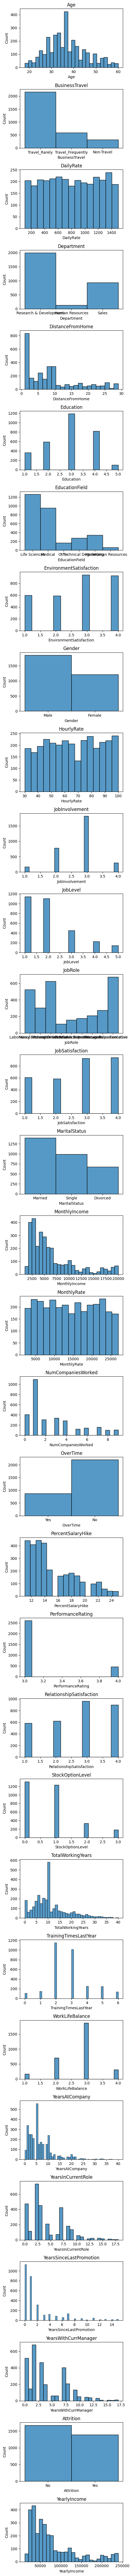

In [614]:
# histograms for train_DF

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize = (5,3*len(columns_to_plot)))

for i, column in enumerate (columns_to_plot):
    sns.histplot(data=train_DF, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

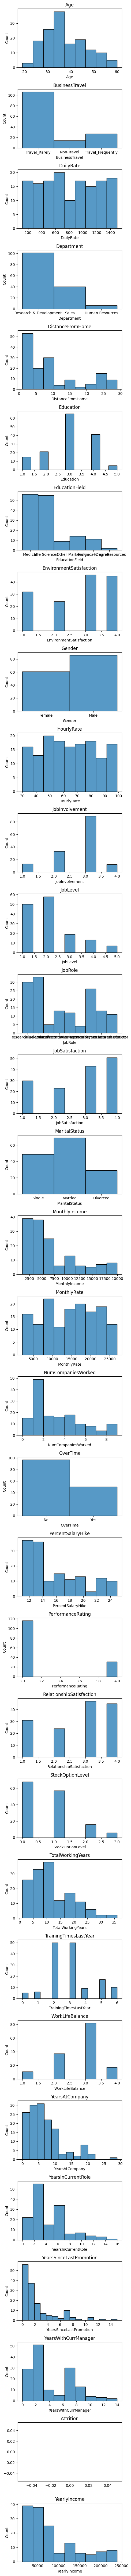

In [615]:
# histograms for X_train

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize = (5,3*len(columns_to_plot)))

for i, column in enumerate (columns_to_plot):
    sns.histplot(data=X_test, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

6. Deletion of columns without any valuable data (one data for whole column)

In [616]:
#X train dataframe

train_DF.drop(['EmployeeCount'], axis= 1, inplace=True)
train_DF.drop(['Over18'], axis=1, inplace=True)
train_DF.drop(['StandardHours'], axis=1, inplace=True)

# dataframe with data for testing

X_test.drop(['EmployeeCount'], axis= 1, inplace=True)
X_test.drop(['Over18'], axis=1, inplace=True)
X_test.drop(['StandardHours'], axis=1, inplace=True)

In [617]:
train_DF.info()
# 3 column should be removed

<class 'pandas.core.frame.DataFrame'>
Index: 3065 entries, 0 to 4446
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            3065 non-null   int64  
 1   Age                       3065 non-null   float64
 2   BusinessTravel            3065 non-null   object 
 3   DailyRate                 3065 non-null   float64
 4   Department                3065 non-null   object 
 5   DistanceFromHome          3065 non-null   float64
 6   Education                 3065 non-null   float64
 7   EducationField            3065 non-null   object 
 8   EnvironmentSatisfaction   3065 non-null   float64
 9   Gender                    3065 non-null   object 
 10  HourlyRate                3065 non-null   float64
 11  JobInvolvement            3065 non-null   float64
 12  JobLevel                  3065 non-null   float64
 13  JobRole                   3065 non-null   object 
 14  JobSatisfacti

In [ ]:
X_test.info()

### Feature Engineering

1. Uniqe value to be modified

In [618]:
# Wypisanie wszystkich unikalnych wartości z poszczególnych kolumn
for column in train_DF.columns:

    unique_values = train_DF[column].unique()

    print(f"Unikalne wartości dla kolumny {column}:")

    print(unique_values)

    print()

Unikalne wartości dla kolumny EmployeeNumber:
[ 104 1638  164 ... 7973 7974 7977]

Unikalne wartości dla kolumny Age:
[30. 38. 26. 28. 35. 34. 32. 42. 40. 48. 39. 18. 43. 21. 53. 45. 29. 33.
 41. 24. 37. 50. 36. 52. 47. 31. 49. 54. 44. 22. 46. 27. 55. 59. 25. 23.
 56. 20. 60. 51. 58. 19. 57.]

Unikalne wartości dla kolumny BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unikalne wartości dla kolumny DailyRate:
[ 852.  397.  841. 1117.  464. 1107. 1018.  269.  296.  989.  855. 1181.
  895.  827.  977.  544.  244.  995. 1343. 1282.  153.  280.  404. 1265.
  252. 1496.  306.  128.  529.  553.  572.  482.  471.  509.  130.  506.
  329.  367. 1219.  746. 1322.  969. 1271. 1158.  688.  319.  371. 1336.
  107.  448.  359.  625. 1017.  835. 1050.  523. 1064. 1128.  928. 1319.
  932.  809. 1376.  253.  336.  884. 1385.  945.  118. 1231.  426.  737.
 1442.  853.  557.  377.  616. 1398. 1138.  531.  138. 1377. 1240. 1400.
 1001. 1082. 1171.  136.  218.  452. 1397. 1192.  944. 

2. Simple replacement

Unique values for chosen column

In [619]:
columns_to_encode = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']

In [620]:
unique_values_train_DF = train_DF[columns_to_encode].apply(lambda x: x.unique()).to_dict()
unique_values_train_DF

{'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Research & Development', 'Human Resources', 'Sales'], dtype=object),
 'EducationField': array(['Life Sciences', 'Medical', 'Other', 'Technical Degree',
        'Marketing', 'Human Resources'], dtype=object),
 'Gender': array(['Male', 'Female'], dtype=object),
 'JobRole': array(['Laboratory Technician', 'Manufacturing Director',
        'Research Scientist', 'Human Resources', 'Research Director',
        'Sales Representative', 'Manager', 'Healthcare Representative',
        'Sales Executive'], dtype=object),
 'MaritalStatus': array(['Married', 'Single', 'Divorced'], dtype=object),
 'OverTime': array(['Yes', 'No'], dtype=object),
 'Attrition': array(['No', 'Yes'], dtype=object)}

In [621]:
unique_values_X_test = X_test[columns_to_encode].apply(lambda x: x.unique()).to_dict()
unique_values_X_test

{'BusinessTravel': array(['Travel_Rarely', 'Non-Travel', 'Travel_Frequently'], dtype=object),
 'Department': array(['Research & Development', 'Sales', 'Human Resources'], dtype=object),
 'EducationField': array(['Medical', 'Life Sciences', 'Other', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Research Scientist', 'Sales Executive', 'Sales Representative',
        'Manufacturing Director', 'Manager', 'Human Resources',
        'Laboratory Technician', 'Healthcare Representative',
        'Research Director'], dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'OverTime': array(['No', 'Yes'], dtype=object),
 'Attrition': array([nan], dtype=object)}

In [ ]:
# unique_values_train_DF.to_csv('/Users/Agnieszka/.git/Klasyfikacja/uniqe_values_train_DF.csv', index=True)

In [622]:
def encode_categorical_columns(dataframe, columns):
    for column in columns:
        unique_values = dataframe[column].unique()
        mapping = {value: i for i, value in enumerate(unique_values)}
        dataframe[column] = dataframe[column].map(mapping)
    return dataframe

In [623]:
encoded_DF = encode_categorical_columns(train_DF, columns_to_encode)
encoded_DF

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,30.0,0,852.0,0,1.0,1.0,0,4.0,0,55.0,2.0,2.0,0,4.0,0,5126.0,15998.0,1.0,0,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,61512.0
1,1638,38.0,0,397.0,0,2.0,2.0,1,4.0,1,54.0,2.0,3.0,1,3.0,0,7756.0,14199.0,3.0,0,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,93072.0
2,164,26.0,0,841.0,0,6.0,3.0,2,3.0,1,46.0,2.0,1.0,2,2.0,0,2368.0,23300.0,1.0,1,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,28416.0
3,395,28.0,0,1117.0,0,8.0,2.0,0,4.0,1,66.0,3.0,1.0,2,4.0,1,3310.0,4488.0,1.0,1,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,39720.0
4,53,35.0,0,464.0,0,4.0,2.0,2,3.0,0,75.0,3.0,1.0,0,4.0,2,1951.0,10910.0,1.0,1,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,23412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4438,7969,41.0,0,582.0,0,28.0,4.0,0,1.0,1,60.0,2.0,4.0,1,2.0,0,13570.0,5640.0,0.0,1,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,3.0,0.0,10.0,1,162840.0
4440,7971,42.0,0,1396.0,0,6.0,3.0,1,3.0,0,83.0,3.0,3.0,4,1.0,0,13348.0,14842.0,9.0,1,13.0,3.0,2.0,1.0,10.0,3.0,4.0,13.0,7.0,5.0,7.0,1,160176.0
4442,7973,42.0,0,1396.0,0,6.0,3.0,1,3.0,0,83.0,3.0,3.0,4,1.0,0,13348.0,14842.0,9.0,1,13.0,3.0,2.0,1.0,10.0,3.0,4.0,13.0,7.0,5.0,7.0,0,160176.0
4443,7974,36.0,0,621.0,0,15.0,3.0,1,1.0,1,73.0,3.0,3.0,7,4.0,0,7978.0,14075.0,1.0,1,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,1,95736.0


In [624]:
encoded_DF_X = encode_categorical_columns(X_test, columns_to_encode)
encoded_DF_X

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1323,100000,35.0,0,1343.0,0,27.0,1.0,0,3.0,0,53.0,2.0,1.0,0,1.0,0,2559.0,17852.0,1.0,0,11.0,3.0,4.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,0,30708.0
1324,100001,27.0,0,1220.0,0,5.0,3.0,1,3.0,0,85.0,3.0,1.0,0,2.0,0,2478.0,20938.0,1.0,1,12.0,3.0,2.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,0,29736.0
1325,100002,24.0,0,1476.0,1,4.0,1.0,0,4.0,0,42.0,3.0,2.0,1,3.0,1,4162.0,15211.0,1.0,1,12.0,3.0,3.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,0,49944.0
1326,100003,37.0,1,142.0,1,9.0,4.0,0,1.0,1,69.0,3.0,3.0,1,2.0,2,8834.0,24666.0,1.0,0,13.0,3.0,4.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,0,106008.0
1327,100004,33.0,0,527.0,0,1.0,4.0,2,4.0,1,63.0,3.0,1.0,0,4.0,0,2686.0,5207.0,1.0,1,13.0,3.0,3.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,0,32232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,35.0,1,208.0,0,8.0,4.0,1,3.0,0,52.0,3.0,2.0,7,3.0,1,4148.0,12250.0,1.0,0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,0,49776.0
1466,100143,41.0,0,582.0,0,28.0,4.0,1,1.0,0,60.0,2.0,4.0,3,2.0,1,13570.0,5640.0,0.0,0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,0,162840.0
1467,100144,42.0,0,1396.0,0,6.0,3.0,0,3.0,1,83.0,3.0,3.0,8,1.0,1,13348.0,14842.0,9.0,0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,0,160176.0
1468,100145,44.0,0,621.0,0,15.0,3.0,0,1.0,0,73.0,3.0,3.0,7,4.0,1,7978.0,14075.0,1.0,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,0,95736.0


In [625]:
encoded_DF_X

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
1323,100000,35.0,0,1343.0,0,27.0,1.0,0,3.0,0,53.0,2.0,1.0,0,1.0,0,2559.0,17852.0,1.0,0,11.0,3.0,4.0,0.0,6.0,3.0,2.0,6.0,5.0,1.0,1.0,0,30708.0
1324,100001,27.0,0,1220.0,0,5.0,3.0,1,3.0,0,85.0,3.0,1.0,0,2.0,0,2478.0,20938.0,1.0,1,12.0,3.0,2.0,0.0,4.0,2.0,2.0,4.0,3.0,1.0,2.0,0,29736.0
1325,100002,24.0,0,1476.0,1,4.0,1.0,0,4.0,0,42.0,3.0,2.0,1,3.0,1,4162.0,15211.0,1.0,1,12.0,3.0,3.0,2.0,5.0,3.0,3.0,5.0,4.0,0.0,3.0,0,49944.0
1326,100003,37.0,1,142.0,1,9.0,4.0,0,1.0,1,69.0,3.0,3.0,1,2.0,2,8834.0,24666.0,1.0,0,13.0,3.0,4.0,1.0,9.0,6.0,3.0,9.0,5.0,7.0,7.0,0,106008.0
1327,100004,33.0,0,527.0,0,1.0,4.0,2,4.0,1,63.0,3.0,1.0,0,4.0,0,2686.0,5207.0,1.0,1,13.0,3.0,3.0,0.0,10.0,2.0,2.0,10.0,9.0,7.0,8.0,0,32232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,100142,35.0,1,208.0,0,8.0,4.0,1,3.0,0,52.0,3.0,2.0,7,3.0,1,4148.0,12250.0,1.0,0,12.0,3.0,4.0,1.0,15.0,5.0,3.0,14.0,11.0,2.0,9.0,0,49776.0
1466,100143,41.0,0,582.0,0,28.0,4.0,1,1.0,0,60.0,2.0,4.0,3,2.0,1,13570.0,5640.0,0.0,0,23.0,4.0,3.0,1.0,21.0,3.0,3.0,20.0,7.0,0.0,10.0,0,162840.0
1467,100144,42.0,0,1396.0,0,6.0,3.0,0,3.0,1,83.0,3.0,3.0,8,1.0,1,13348.0,14842.0,9.0,0,13.0,3.0,2.0,1.0,18.0,3.0,4.0,13.0,7.0,5.0,7.0,0,160176.0
1468,100145,44.0,0,621.0,0,15.0,3.0,0,1.0,0,73.0,3.0,3.0,7,4.0,1,7978.0,14075.0,1.0,0,11.0,3.0,4.0,1.0,10.0,2.0,3.0,10.0,7.0,0.0,5.0,0,95736.0


In [626]:
unique_values_after_encoding = train_DF[columns_to_encode].apply(lambda x: x.unique()).to_dict()
unique_values_after_encoding

{'BusinessTravel': array([0, 1, 2], dtype=int64),
 'Department': array([0, 1, 2], dtype=int64),
 'EducationField': array([0, 1, 2, 3, 4, 5], dtype=int64),
 'Gender': array([0, 1], dtype=int64),
 'JobRole': array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int64),
 'MaritalStatus': array([0, 1, 2], dtype=int64),
 'OverTime': array([0, 1], dtype=int64),
 'Attrition': array([0, 1], dtype=int64)}

In [ ]:
unique_values_after_encoding_X = X_test[columns_to_encode].apply(lambda x: x.unique()).to_dict()
unique_values_after_encoding_X

### Data discretization

First histogram will be show for train_DF and X_train dataset to compare and control if previous data manipulation
has been done properly.

Discretization will be performed first for train_DF than for X_test

a) Age column data discretization

<Axes: >

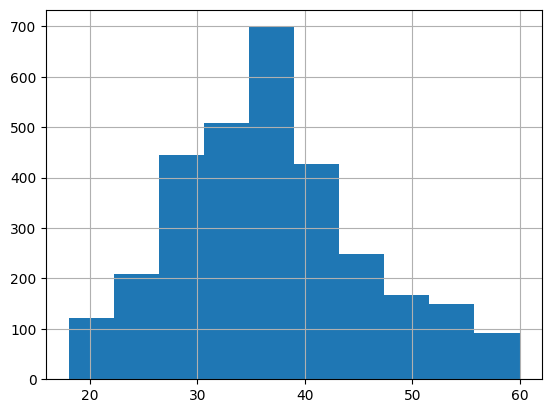

In [627]:
train_DF['Age'].hist()

In [ ]:
max_Age = train_DF.loc[train_DF['Age']>50]
max_Age

In [628]:
max_Age = train_DF.loc[train_DF['Age']>60]
max_Age

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome


In [631]:
# age division into bins for training and test data

train_DF['Age_Bin'] = pd.cut(train_DF.Age, labels=['17-30', '31-45', '46-60'], bins=[17, 30, 45, 60])

X_test['Age_Bin'] = pd.cut(X_test.Age, labels=['17-30', '31-45', '46-60'], bins=[17, 30, 45, 60])

In [ ]:
train_DF.head(30)

In [633]:
#Age conversion from bins to numeric for train_DF


unique_age_bin = tuple(train_DF.Age_Bin.unique())

train_DF['Age_Bin'].replace(unique_age_bin, range(len(unique_age_bin)), inplace=True)
train_DF.drop('Age', axis=1, inplace=True)



In [634]:
#Age conversion from bins to numeric for X_test
unique_age_bin_X = tuple(X_test.Age_Bin.unique())
X_test['Age_Bin'].replace(unique_age_bin_X, range(len(unique_age_bin_X)), inplace=True)
X_test.drop('Age', axis=1, inplace=True)


In [635]:
train_DF['Age_Bin'].describe()

count     3065
unique       3
top          1
freq      1770
Name: Age_Bin, dtype: int64

In [636]:
X_test['Age_Bin'].describe()

count     147
unique      3
top         0
freq       86
Name: Age_Bin, dtype: int64

b) Data discretization for rested columns

<Axes: >

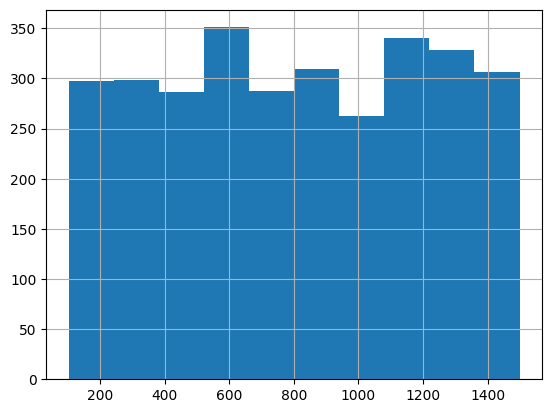

In [637]:
train_DF['DailyRate'].hist()

<Axes: >

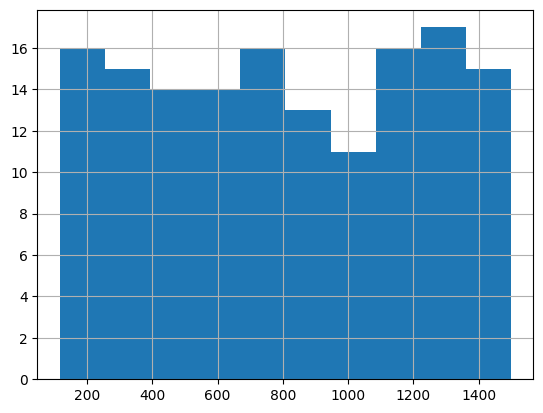

In [638]:
X_test['DailyRate'].hist()

In [639]:
daily_rate = train_DF["DailyRate"]
categories = pd.qcut(daily_rate, q=5, labels=False)
train_DF["DailyRate"] = categories


daily_rateX = X_test["DailyRate"]
categoriesX = pd.qcut(daily_rateX, q=5, labels=False)
X_test["DailyRate"] = categoriesX

<Axes: >

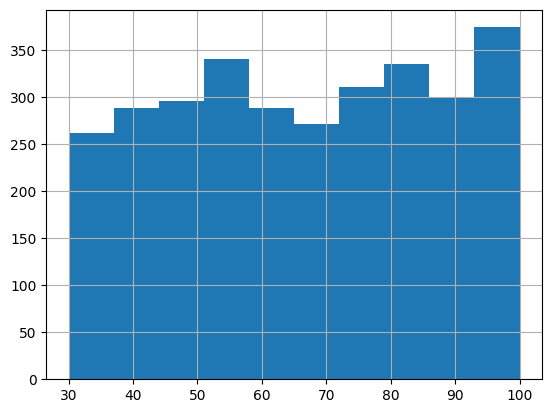

In [640]:
train_DF['HourlyRate'].hist()

<Axes: >

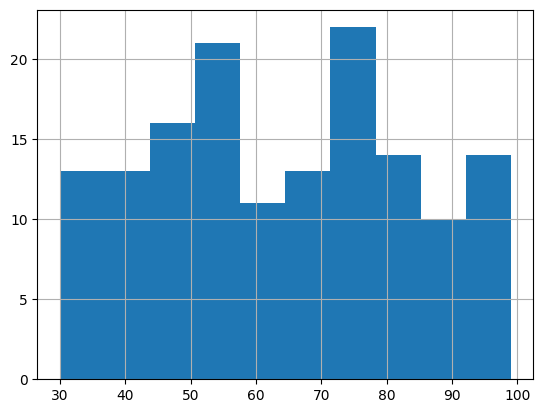

In [641]:
X_test['HourlyRate'].hist()

In [642]:
HourlyRate = train_DF["HourlyRate"]
categories = pd.qcut(HourlyRate, q=5, labels=False)
train_DF["HourlyRate"] = categories

HourlyRateX = X_test["HourlyRate"]
categoriesX = pd.qcut(HourlyRateX, q=5, labels=False)
X_test["HourlyRate"] = categoriesX

<Axes: >

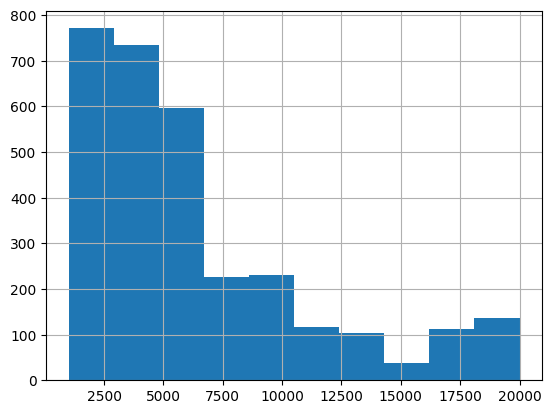

In [643]:
train_DF['MonthlyIncome'].hist()

<Axes: >

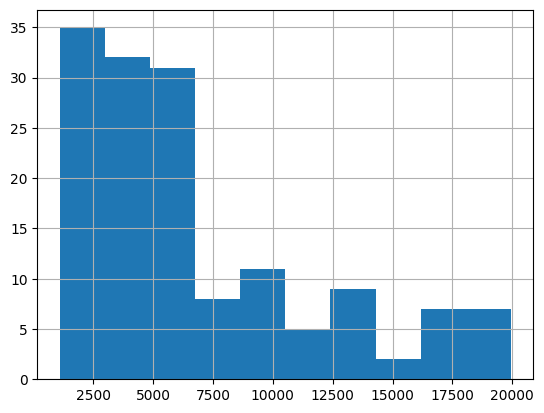

In [644]:
X_test['MonthlyIncome'].hist()

In [645]:
MonthlyIncome = train_DF["MonthlyIncome"]
categories = pd.qcut(MonthlyIncome, q=5, labels=False)
train_DF["MonthlyIncome"] = categories


MonthlyIncomeX = X_test["MonthlyIncome"]
categoriesX = pd.qcut(MonthlyIncomeX, q=5, labels=False)
X_test["MonthlyIncome"] = categoriesX

<Axes: >

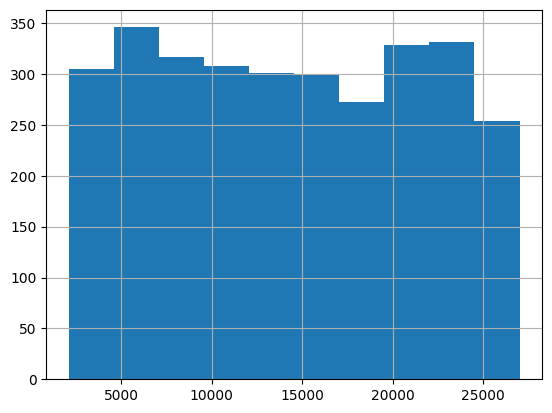

In [646]:
train_DF['MonthlyRate'].hist()

<Axes: >

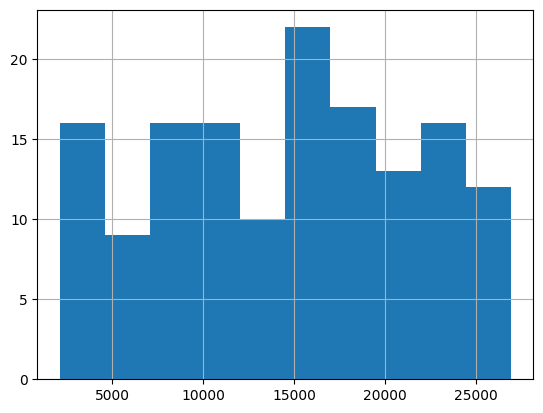

In [647]:
X_test['MonthlyRate'].hist()

In [648]:
MonthlyRate = train_DF["MonthlyRate"]
categories = pd.qcut(MonthlyRate, q=5, labels=False)
train_DF["MonthlyRate"] = categories


MonthlyRateX = X_test["MonthlyRate"]
categoriesX = pd.qcut(MonthlyRateX, q=5, labels=False)
X_test["MonthlyRate"] = categoriesX


<Axes: >

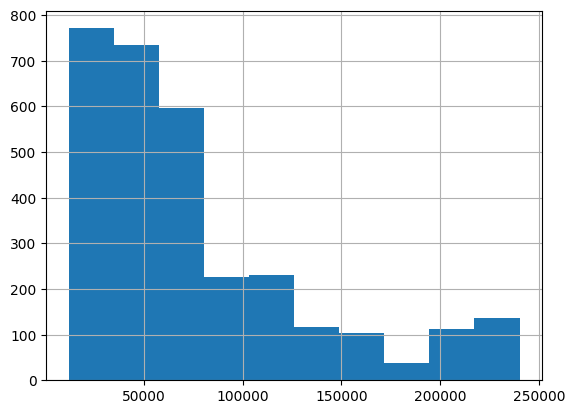

In [649]:
train_DF['YearlyIncome'].hist()

<Axes: >

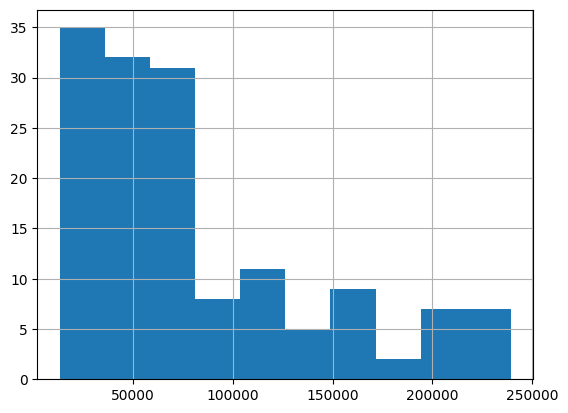

In [650]:
X_test['YearlyIncome'].hist()

In [651]:
YearlyIncome = train_DF["YearlyIncome"]
categories = pd.qcut(YearlyIncome, q=5, labels=False)
train_DF["YearlyIncome"] = categories

YearlyIncomeX = X_test["YearlyIncome"]
categoriesX = pd.qcut(YearlyIncomeX, q=5, labels=False)
X_test["YearlyIncome"] = categoriesX

In [652]:
train_DF.head(30)

,EmployeeNumber,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome,Age_Bin
0,104,0,2,0,1.0,1.0,0,4.0,0,1,2.0,2.0,0,4.0,0,2,2,1.0,0,12.0,3.0,3.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,0,2,0
1,1638,0,1,0,2.0,2.0,1,4.0,1,1,2.0,3.0,1,3.0,0,3,2,3.0,0,19.0,3.0,4.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,0,3,1
2,164,0,2,0,6.0,3.0,2,3.0,1,1,2.0,1.0,2,2.0,0,0,4,1.0,1,19.0,3.0,3.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,0,0,0
3,395,0,3,0,8.0,2.0,0,4.0,1,2,3.0,1.0,2,4.0,1,1,0,1.0,1,21.0,4.0,4.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,0,1,0
4,53,0,1,0,4.0,2.0,2,3.0,0,3,3.0,1.0,0,4.0,2,0,1,1.0,1,12.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,0,0,1
5,1467,0,3,1,9.0,4.0,3,1.0,1,1,3.0,1.0,3,3.0,0,1,0,1.0,1,15.0,3.0,4.0,0.0,2.0,0.0,3.0,2.0,2.0,2.0,2.0,1,1,1
6,727,0,3,0,3.0,2.0,0,3.0,1,0,3.0,3.0,4,4.0,1,4,3,3.0,1,15.0,3.0,4.0,0.0,10.0,6.0,3.0,7.0,7.0,7.0,7.0,0,4,1
7,351,0,0,0,2.0,3.0,1,4.0,1,1,2.0,1.0,0,1.0,2,0,1,0.0,0,11.0,3.0,3.0,1.0,10.0,4.0,3.0,9.0,6.0,7.0,8.0,0,0,1
8,555,1,0,2,6.0,2.0,4,4.0,1,0,1.0,1.0,5,3.0,2,0,2,0.0,1,16.0,3.0,4.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,0.0,1,0,1
9,253,0,3,0,4.0,1.0,1,4.0,1,1,3.0,5.0,6,3.0,0,4,0,1.0,1,14.0,3.0,2.0,1.0,21.0,2.0,3.0,20.0,8.0,9.0,9.0,0,4,1


In [ ]:
X_test.head(30)

In [653]:
train_DF.describe()

,EmployeeNumber,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
count,3065.00000,3065.000000,3065.00000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,4149.11876,0.397064,1.99739,0.655791,8.999347,2.898858,1.234910,2.721044,0.396411,1.963785,2.732463,2.057749,3.921370,2.719739,0.764763,1.998695,1.999347,2.683197,0.716803,15.187276,3.151060,2.709625,0.799021,11.176509,2.801305,2.759543,6.842414,4.140946,2.102773,4.039804,0.454486,1.998695
std,2829.06042,0.666176,1.41398,0.915464,7.763180,1.028422,1.445582,1.095399,0.489231,1.409935,0.706788,1.106116,3.026862,1.102196,0.788998,1.415597,1.413983,2.491591,0.450625,3.646527,0.358166,1.082372,0.856971,7.567570,1.289898,0.703354,5.905337,3.503034,3.128692,3.457837,0.498005,1.415597
min,1.00000,0.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1180.00000,0.000000,1.00000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000
50%,5366.00000,0.000000,2.00000,0.000000,8.000000,3.000000,1.000000,3.000000,0.000000,2.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000,2.000000
75%,6705.00000,1.000000,3.00000,2.000000,12.000000,4.000000,2.000000,4.000000,1.000000,3.000000,3.000000,3.000000,7.000000,4.000000,1.000000,3.000000,3.000000,4.000000,1.000000,18.000000,3.000000,4.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,1.000000,3.000000
max,7977.00000,2.000000,4.00000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,4.000000,4.000000,5.000000,8.000000,4.000000,2.000000,4.000000,4.000000,9.000000,1.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000,4.000000


In [655]:
columns_to_show = list(train_DF.columns)
columns_to_show

['EmployeeNumber',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Attrition',
 'YearlyIncome',
 'Age_Bin']

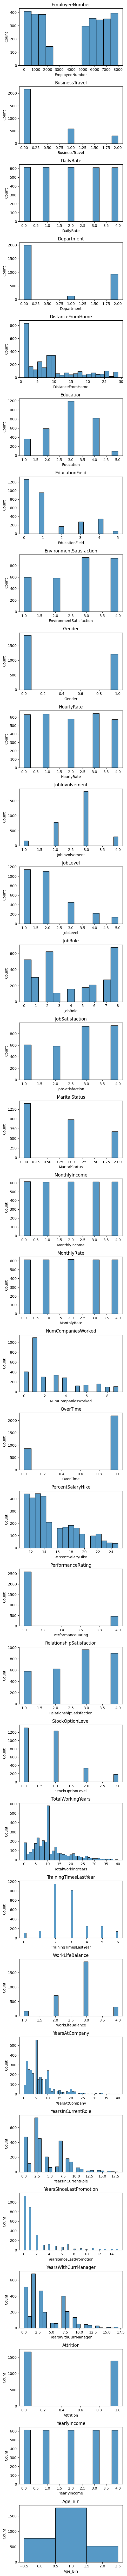

In [656]:
# histograms after feature engeeniring

fig, axes = plt.subplots(nrows=len(columns_to_show), figsize = (5,3*len(columns_to_show)))

for i, column in enumerate (columns_to_show):
    sns.histplot(data=train_DF, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

In [ ]:
# histograms after feature engeeniring

fig, axes = plt.subplots(nrows=len(columns_to_show), figsize = (5,3*len(columns_to_show)))

for i, column in enumerate (columns_to_show):
    sns.histplot(data=X_test, x=column, ax=axes[i])
    axes[i].set_title(column)
plt.tight_layout()
plt.show()

In [658]:
X_test.shape

(147, 33)

In [660]:
test_target = pd.read_csv('test_target.csv')

In [661]:
test_target.shape

(147, 2)

### X_train, y_train, X_test, y_test preparation


train_DF
X_train = train_DF-Attrotition
y_train = col ATTrition z train_DF


X_test
x_test = X_test - attrition
y_test = col attrition X_test

In [ ]:


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()